In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# **Hear Disease Prediction Using Machine Learning**

## Data Analysis

## Importing Required Libraries and Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing Starts Here

## Importing the Dataset

In [4]:
dataset=pd.read_csv("heart_data.csv")

In [5]:
dataset.shape

(303, 14)

In [6]:
dataset.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  
6   0     2       1  
7   0     3       1  
8   0     3       1  
9   0     2       1

In [7]:
dataset.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [8]:
information=["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
             "resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl",
             "resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved",
             "exercise induced angina","oldpeak = ST depression induced by exercise relative to rest",
             "the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy",
             "thal: 3 = normal; 6 = fixed defect; 7 = reversable defect", "0: Healthy, 1: Problem with Heart"]

In [9]:
table=pd.DataFrame(information,index=dataset.columns[:])
table

0
age                                                     age
sex                                      1: male, 0: female
cp        chest pain type, 1: typical angina, 2: atypica...
trestbps                             resting blood pressure
chol                             serum cholestoral in mg/dl
fbs                         fasting blood sugar > 120 mg/dl
restecg   resting electrocardiographic results (values 0...
thalach                         maximum heart rate achieved
exang                               exercise induced angina
oldpeak   oldpeak = ST depression induced by exercise re...
slope             the slope of the peak exercise ST segment
ca        number of major vessels (0-3) colored by flour...
thal      thal: 3 = normal; 6 = fixed defect; 7 = revers...
target                    0: Healthy, 1: Problem with Heart

In [10]:
table.to_excel("Dataset Information.xlsx")

In [11]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [12]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Performing Exploratory Data Analysis(EDA)

#### Understanding target column

In [13]:
sns.countplot(x='target',data=dataset)  
plt.show()

In [14]:
target_values=dataset.target.value_counts()
plt.figure()
plt.pie(target_values.values, labels = ["target 1", "target 0"], autopct='%1.1f%%', radius = 1.5) 
plt.show()
plt.savefig("Target Pie")

<Figure size 640x480 with 0 Axes>

In [15]:
print(target_values)
print("How many positive and negative values in dataset: \n")
print("Entries percentage not having heart disease: "+str(round(target_values[0]*100/303))+"%")
print("Entries percentage not having heart disease: "+str(round(target_values[1]*100/303))+"%")

target
1    165
0    138
Name: count, dtype: int64
How many positive and negative values in dataset: 

Entries percentage not having heart disease: 46%
Entries percentage not having heart disease: 54%


### Visualising Columns

1: male, 0: female

In [16]:
sns.countplot(x='sex',data=dataset)  
plt.show()

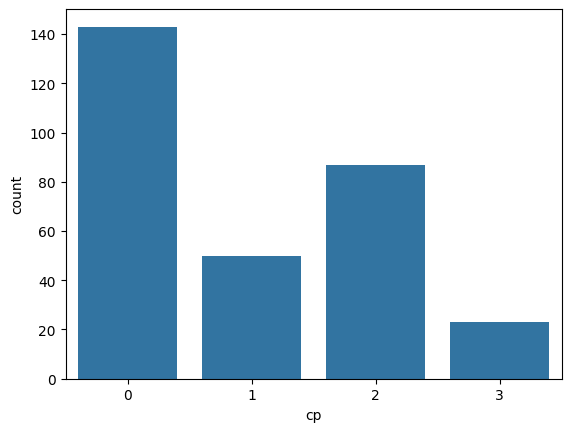

In [17]:
sns.countplot(x='cp',data=dataset)  
plt.show()

In [18]:
sns.displot(dataset["cp"])
plt.savefig("cp-count-plot")

In [19]:
import plotly.express as px
plt.figure(figsize=(10,10))
fig = px.histogram(dataset, x="cp", color='target', barmode='group', height=400)
fig.update_layout(title="Effect of chest pain on heart disease", xaxis_title="chest pain",\
                  yaxis_title="no. of cases",legend_title="target", font=dict(size=12))
plt.savefig("CP")
fig.show()

<Figure size 1000x1000 with 0 Axes>

In [20]:
sns.countplot(x='fbs',data=dataset)  
plt.show()

In [21]:
sns.countplot(x='restecg',data=dataset)  
plt.show()

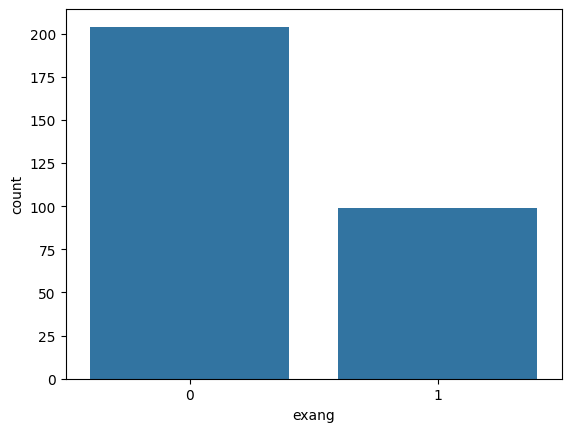

In [22]:
sns.countplot(x='exang',data=dataset)  
plt.show()

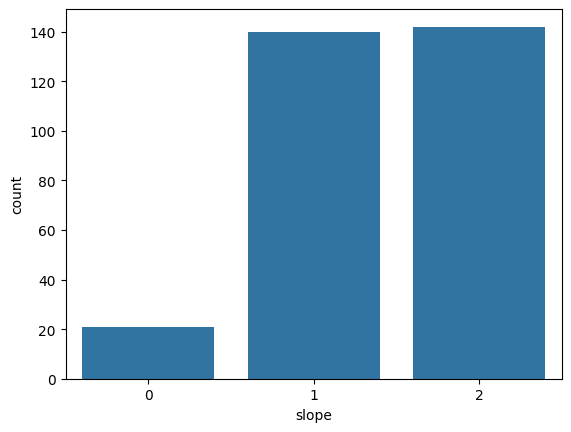

In [23]:
sns.countplot(x='slope',data=dataset)  
plt.show()

In [24]:
sns.countplot(x='ca',data=dataset)  
plt.show()

In [25]:
sns.countplot(x='thal',data=dataset)  
plt.show()

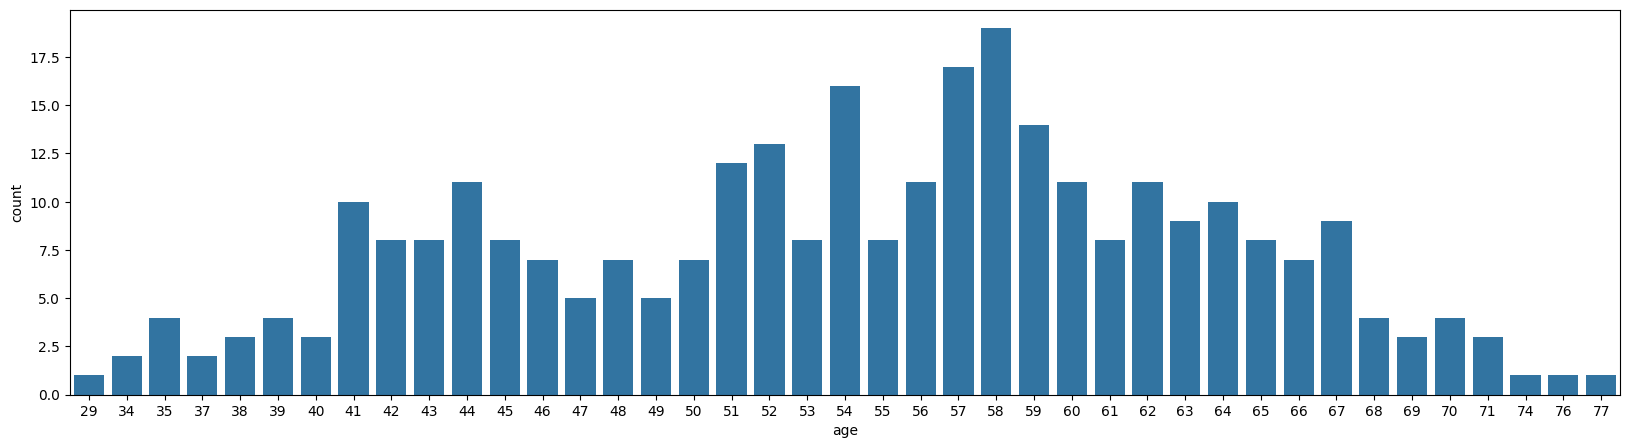

In [26]:
plt.figure(figsize = (20,5))
sns.countplot(x='age',data=dataset)  
plt.show()

### Heat Map

In [27]:
corelation=dataset.corr()

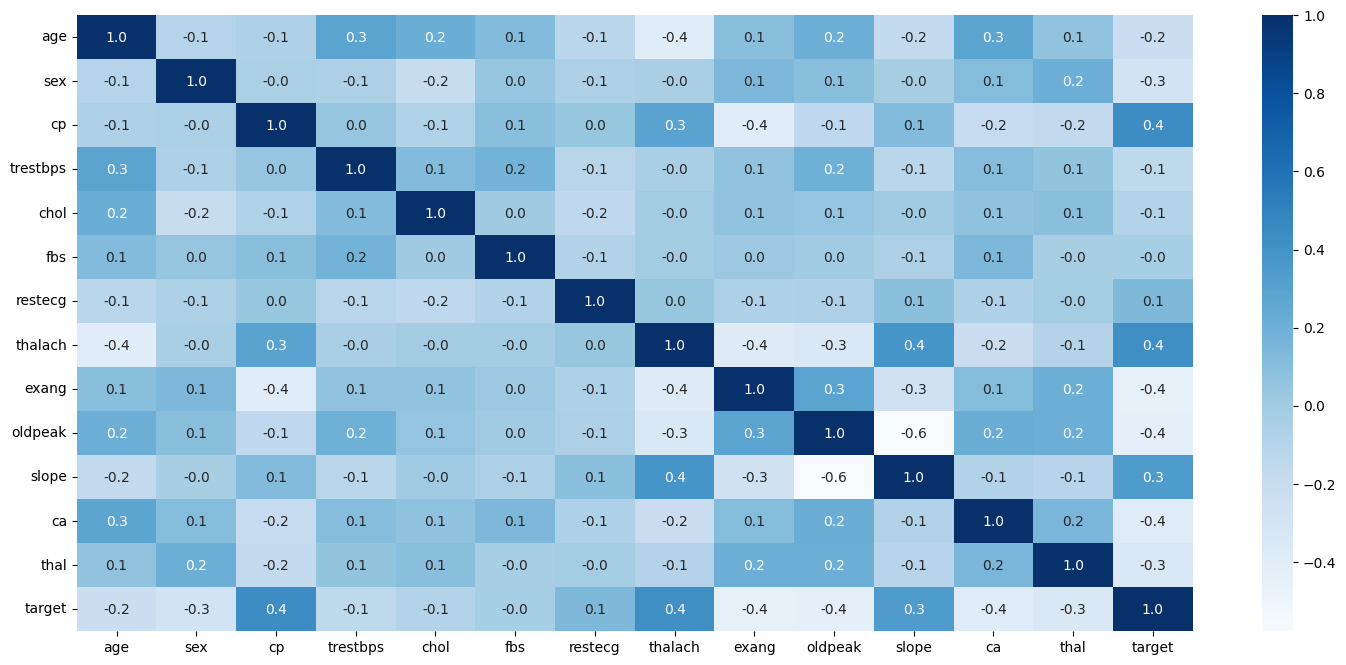

In [28]:
plt.figure(figsize=(18,8))
sns.heatmap(corelation, cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.savefig("Heatmap Co-relation")